# ŞABLON EŞLEME
Şablon eşleştirme, bir şablon görüntünün konumunu daha büyük bir görüntüde aramak ve bulmak için bir yöntemdir.
• Kaydırarak, şablonu bir seferde bir piksel hareket ettirmeyi kastediyoruz (soldan
sağa, yukarıdan aşağıya). 
• Her konumda, o konumdaki eşleşmenin ne kadar "iyi" veya "kötü" olduğunu (veya şablonun kaynak görüntünün o belirli alanına ne kadar benzer olduğunu) temsil edecek şekilde bir metrik hesaplanır.

(341, 512)
(140, 135)


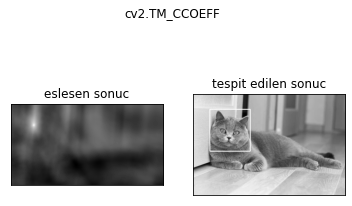

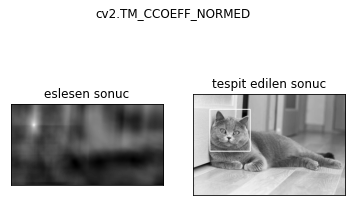

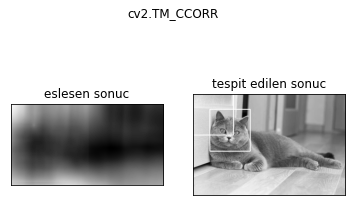

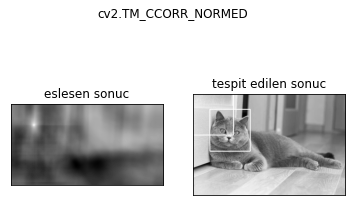

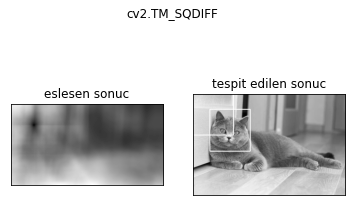

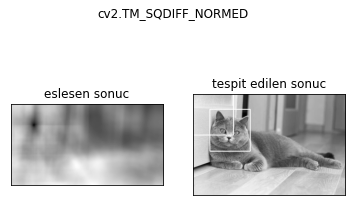

In [4]:
#kütüphaneleri import edelim
import cv2
import matplotlib.pyplot as plt
import numpy as np

#resmi al 
img = cv2.imread("img/cat.jpg", 0)
print(img.shape)
template = cv2.imread("img/cat_head.jpg", 0)
print(template.shape)
h,w=template.shape

# bu 6 methodu teker teker deneyeceğiz ve aralarından en basarili olanı sececegiz
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods:
    
    method = eval(meth)

    # Şablon Eşleştirmeyi uygula
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    # Yöntem TM_SQDIFF veya TM_SQDIFF_NORMED ise minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)

    cv2.rectangle(img,top_left, bottom_right, 255, 2)

    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('eslesen sonuc'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('tespit edilen sonuc'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)

    plt.show()